## Importing common libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
input_data = pd.read_csv(filepath_or_buffer=r'./Social_Network_Ads.csv')
input_data.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [3]:
X = input_data.drop(columns=['Purchased', 'User ID','Gender'])
y = input_data[['Purchased']]

## Feature scaling input

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().reshape(-1,), test_size = 0.25, random_state = 0)

## Fitting KNN to the Training set

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Predicting the Test set results

In [10]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [12]:
cm = confusion_matrix(y_test, y_pred)

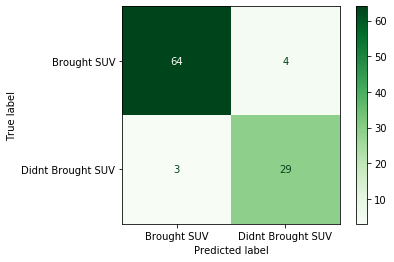

In [13]:
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Greens,
                            display_labels = ['Brought SUV', 'Didnt Brought SUV'])

## Visualising the Training set results

In [14]:
from matplotlib.colors import ListedColormap

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


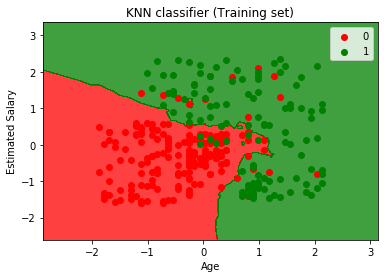

In [15]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()